In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("bar_data.csv")

In [3]:
df.shape

(87569, 2)

In [4]:
df.dtypes

Responder_id            int64
LanguagesWorkedWith    object
dtype: object

In [5]:
df.head()

,Responder_id,LanguagesWorkedWith
0,1,HTML/CSS;Java;JavaScript;Python
1,2,C++;HTML/CSS;Python
2,3,HTML/CSS
3,4,C;C++;C#;Python;SQL
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA


In [7]:
df.LanguagesWorkedWith.nunique()

20098

In [8]:
df["langs"] = df["LanguagesWorkedWith"].apply(lambda x : x.split(";"))

In [9]:
df.head()

,Responder_id,LanguagesWorkedWith,langs
0,1,HTML/CSS;Java;JavaScript;Python,"[HTML/CSS, Java, JavaScript, Python]"
1,2,C++;HTML/CSS;Python,"[C++, HTML/CSS, Python]"
2,3,HTML/CSS,[HTML/CSS]
3,4,C;C++;C#;Python;SQL,"[C, C++, C#, Python, SQL]"
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,"[C++, HTML/CSS, Java, JavaScript, Python, SQL,..."


In [10]:
df.langs[0]

['HTML/CSS', 'Java', 'JavaScript', 'Python']

In [11]:
df.langs[0][0]

'HTML/CSS'

In [12]:
df.langs[0][1]

'Java'

In [14]:
for k in df.langs[0]:
    print(k)

HTML/CSS
Java
JavaScript
Python


In [15]:
total_list =[]
for i in range(len(df.langs)):
    for k in df.langs[i]:
        total_list.append(k)

In [16]:
len(total_list)

440505

In [17]:
total_list[:10]

['HTML/CSS',
 'Java',
 'JavaScript',
 'Python',
 'C++',
 'HTML/CSS',
 'Python',
 'HTML/CSS',
 'C',
 'C++']

In [18]:
sample = ["apple", "apple", "apple", "orange", "apple", "orange"]

In [19]:
counts = Counter(sample)

In [20]:
counts

Counter({'apple': 4, 'orange': 2})

In [22]:
lang_count = Counter(total_list)

In [23]:
lang_count

Counter({'HTML/CSS': 55466,
         'Java': 35917,
         'JavaScript': 59219,
         'Python': 36443,
         'C++': 20524,
         'C': 18017,
         'C#': 27097,
         'SQL': 47544,
         'VBA': 4781,
         'R': 5048,
         'Bash/Shell/PowerShell': 31991,
         'Ruby': 7331,
         'Rust': 2794,
         'TypeScript': 18523,
         'WebAssembly': 1015,
         'Other(s):': 7920,
         'Go': 7201,
         'PHP': 23030,
         'Assembly': 5833,
         'Kotlin': 5620,
         'Swift': 5744,
         'Objective-C': 4191,
         'Elixir': 1260,
         'Erlang': 777,
         'Clojure': 1254,
         'F#': 973,
         'Scala': 3309,
         'Dart': 1683})

In [28]:
most_common_langs = lang_count.most_common(15)

In [29]:
most_comman_langs

[('JavaScript', 59219),
 ('HTML/CSS', 55466),
 ('SQL', 47544),
 ('Python', 36443),
 ('Java', 35917),
 ('Bash/Shell/PowerShell', 31991),
 ('C#', 27097),
 ('PHP', 23030),
 ('C++', 20524),
 ('TypeScript', 18523),
 ('C', 18017),
 ('Other(s):', 7920),
 ('Ruby', 7331),
 ('Go', 7201),
 ('Assembly', 5833)]

In [30]:
x, y = zip(*most_common_langs)

In [31]:
x[:5]

('JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java')

In [32]:
y[:5]

(59219, 55466, 47544, 36443, 35917)

In [33]:
type(x)

tuple

In [34]:
x, y = list(x), list(y)

<BarContainer object of 15 artists>

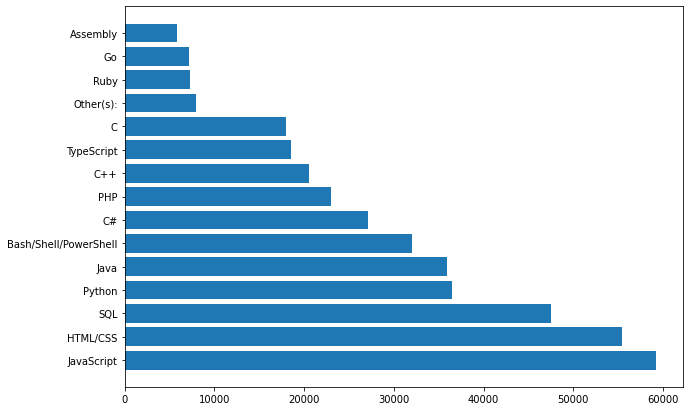

In [35]:
fig, ax =plt.subplots(figsize=(10,7))
ax.barh(x,y)

In [36]:
x.reverse()
y.reverse()

<BarContainer object of 15 artists>

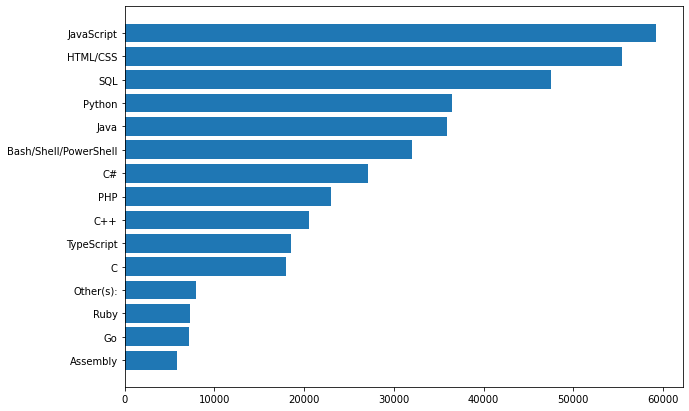

In [37]:
fig, ax =plt.subplots(figsize=(10,7))
ax.barh(x,y)

<BarContainer object of 15 artists>

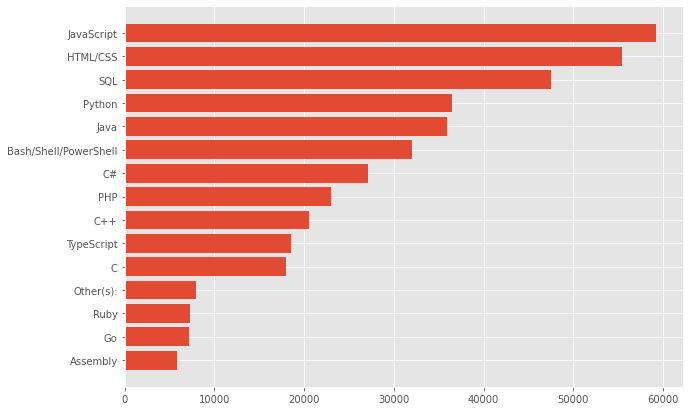

In [38]:
plt.style.use('ggplot')
fig, ax =plt.subplots(figsize=(10,7))
ax.barh(x,y)

<BarContainer object of 15 artists>

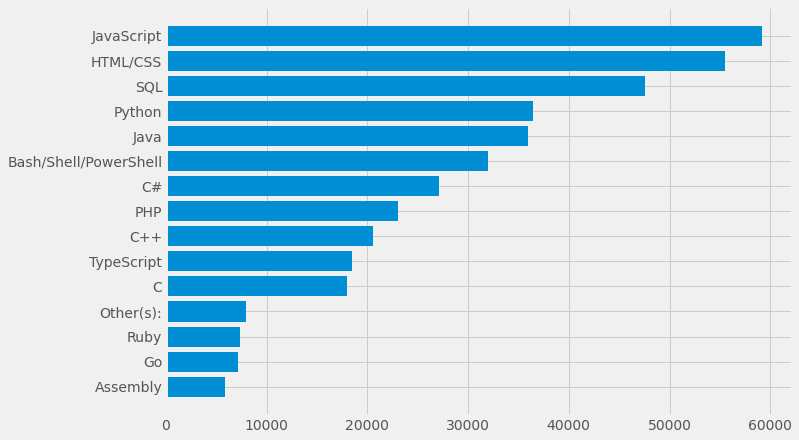

In [39]:
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(figsize=(10,7))
ax.barh(x,y)

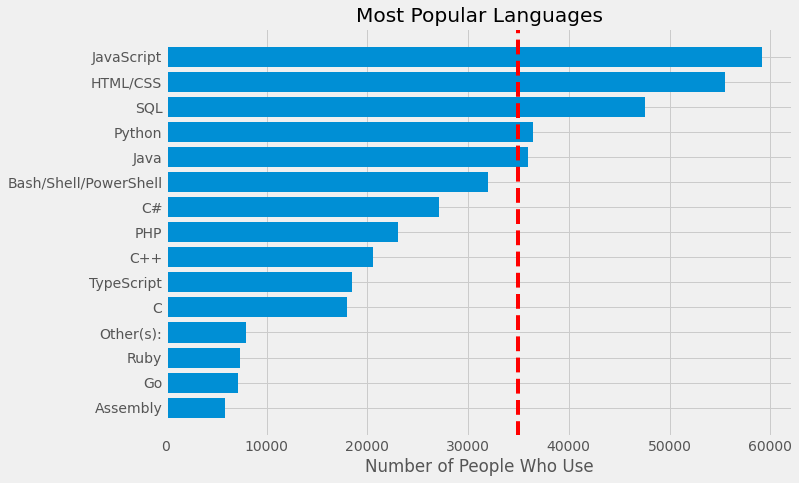

In [40]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(x, y)
ax.set_title("Most Popular Languages")
ax.set_xlabel('Number of People Who Use')
ax.axvline(x=35000, color='red', ls='--')

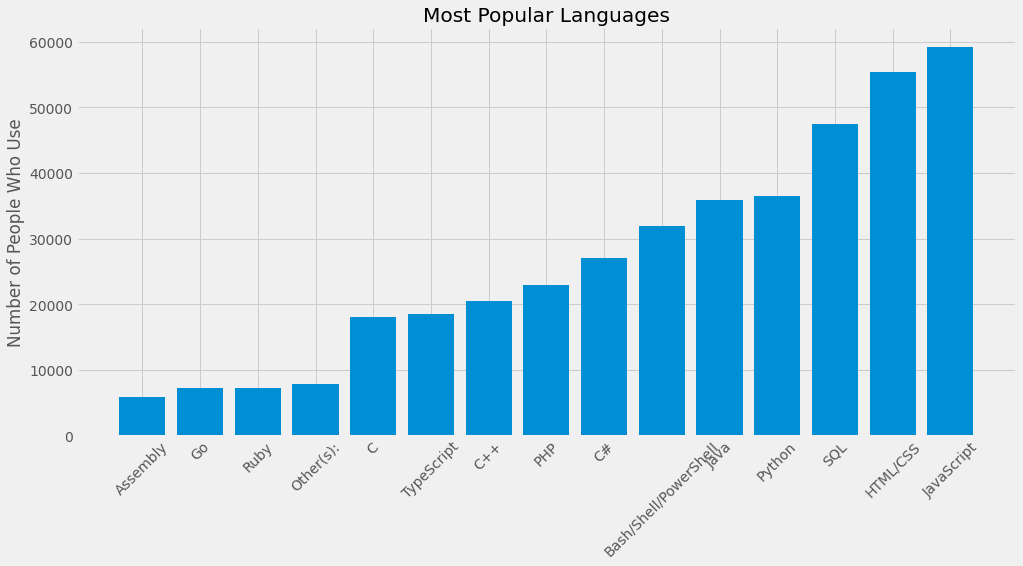

In [41]:
x_pos = np.arange(len(x))
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x, y)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=45);

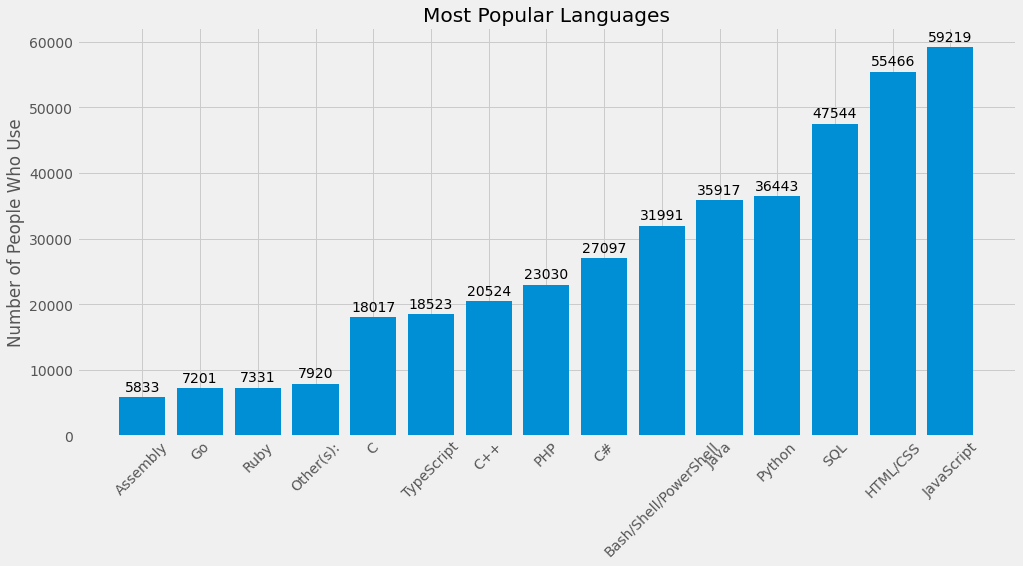

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))
rects1=ax.bar(x, y)
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=45);
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)